In [2]:
#卷积神经网络（CNN）
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.cifar10.load_data()

NameError: name 'tensorflow' is not defined

In [2]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [3]:
print(y_train[1])

[9]


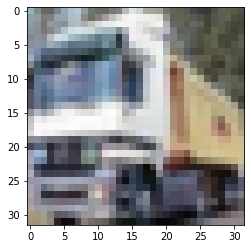

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [5]:
X_train = tf.keras.utils.normalize(x_train, axis=1)
X_test = tf.keras.utils.normalize(x_test, axis=1)

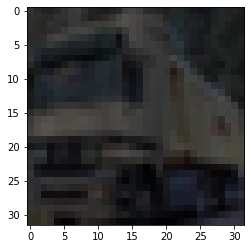

In [6]:
plt.imshow(X_train[1])

In [7]:
X_train = x_train/255
X_test = x_test/255

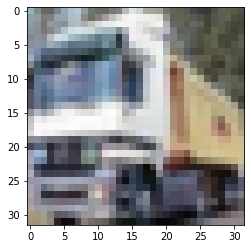

In [8]:
plt.imshow(X_train[1])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
import time

conv_count=[1,2]
fullyconn_count=[1,2,3]
unit_count=[32,64]

for conv in conv_count:
    for fullyconn in fullyconn_count:
        for unit in unit_count:
            logs_file = f'logs/conv_{conv}_fconn_{fullyconn}_unit_{unit}_{int(time.time())}'
            checkpoint_filepath=f'./models/conv_{conv}_fconn_{fullyconn}_unit_{unit}_'+'{epoch:02d}-{val_accuracy:.2f}.hdf5'
            print(logs_file)
            print(checkpoint_filepath)
          
            tensorboard = TensorBoard(log_dir=logs_file)

            #checkpoint
#             checkpoint_filepath='./models/{epoch:02d}-{val_accuracy:.2f}.hdf5'
            checkpoint = ModelCheckpoint(filepath=checkpoint_filepath,
                                         monitor='val_accuracy',
                                         mode='max',
                                         save_best_only=True,
                                         verbose=1
                                        )

            model = Sequential()

            #conv layer
            model.add(Conv2D(unit,(3,3),activation='relu'))
            #MaxPooling layer
            model.add(MaxPooling2D(pool_size=(2,2)))
            
            for i in range(conv-1):
                model.add(Conv2D(unit,(3,3),activation='relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))                

            #Flatten layer（平化层）
            model.add(Flatten())

            #fully connected layer
            for i in range(fullyconn):
                model.add(Dense(unit, activation='relu'))

            #output layer
            model.add(Dense(10,activation='softmax'))

            #compile
            model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics='accuracy')

            model.fit(X_train,y_train,batch_size=100,epochs=5,validation_split=0.1, callbacks=[tensorboard,checkpoint])

In [56]:
from tensorflow.keras.models import load_model
model_best = load_model('models/conv_2_fconn_1_unit_64_05-0.66.hdf5')
print(model_best.summary())

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (100, 30, 30, 64)         1792      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (100, 15, 15, 64)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (100, 13, 13, 64)         36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (100, 6, 6, 64)           0         
_________________________________________________________________
flatten_19 (Flatten)         (100, 2304)               0         
_________________________________________________________________
dense_39 (Dense)             (100, 64)                 147520    
_________________________________________________________________
dense_40 (Dense)             (100, 10)               

In [98]:
pre = model_best.predict(X_test)
# print(pre)
import numpy as np
pre = np.argmax(pre, axis=1)

In [102]:
pre = np.reshape(pre,(len(pre),1))
print(y_test-pre)

[[ 0]
 [ 7]
 [ 0]
 ...
 [ 0]
 [-3]
 [ 0]]


In [106]:
pre_y_test = y_test-pre
print(1-np.count_nonzero(pre_y_test)/len(y_test))

0.6557999999999999


[8]


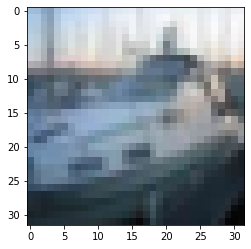

In [109]:
print(pre[2])
plt.imshow(x_test[2])

In [35]:
model.save('cnn_image_classfication.model')

INFO:tensorflow:Assets written to: cnn_image_classfication.model/assets


In [36]:
from tensorflow.keras.models import load_model
model_load = load_model('cnn_image_classfication.model')

In [37]:
model_load.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                921664    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 924,106
Trainable params: 924,106
Non-trainable params: 0
_________________________________________________________________


In [32]:
3*3*3*64+64

1792

In [33]:
15*15*64

14400

In [34]:
(14400+1)*64

921664